In [1]:
#### Loan Default Prediction ####
## Machine Learning end-to-project ##
## Dataset source: kaggle ##

In [2]:
# Import all the required libraries for data analysis and model building
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn import linear_model,svm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [3]:
# Import the dataset
df = pd.read_csv('C:/Users/charl/OneDrive/Desktop/Data Science Projects/Python Projects/loan.csv')

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\2824701395.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/charl/OneDrive/Desktop/Data Science Projects/Python Projects/loan.csv')


In [4]:
# Check dimension
df.shape

(887379, 74)

In [5]:
# Have a look at the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [6]:
#data desecription
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [7]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
## checcking for missing values null and their count in percentage
Nulldf = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100 * df.isnull().sum()/len(df)})
Nulldf[Nulldf['Count']>0]

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


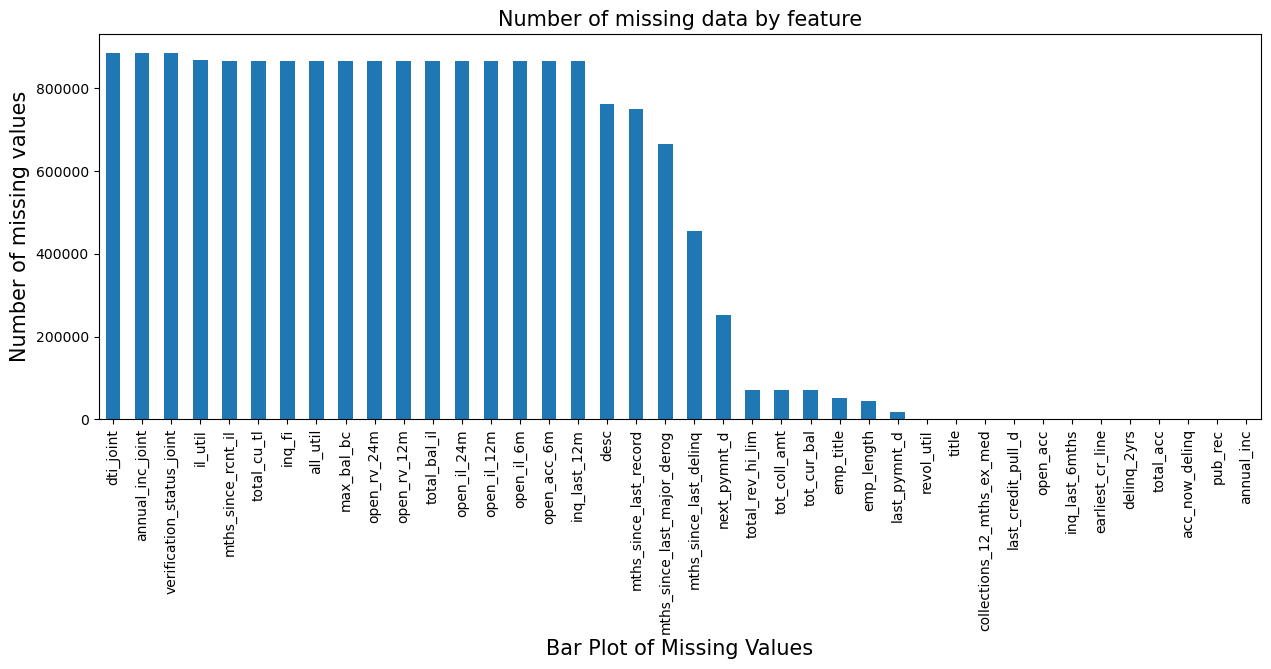

In [9]:
### plot for missing values na
# Plot missing values
# Plot missing values
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [10]:
## Dropping the variables which have more than 70% of Na Values
df1 = df.dropna(axis = 1, thresh = int(0.70 * len(df)))

In [11]:
### shape of new dataframe
df1.shape

(887379, 53)

In [12]:
## Description of new data
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [13]:
### A look at the Target Variable ###
df1.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

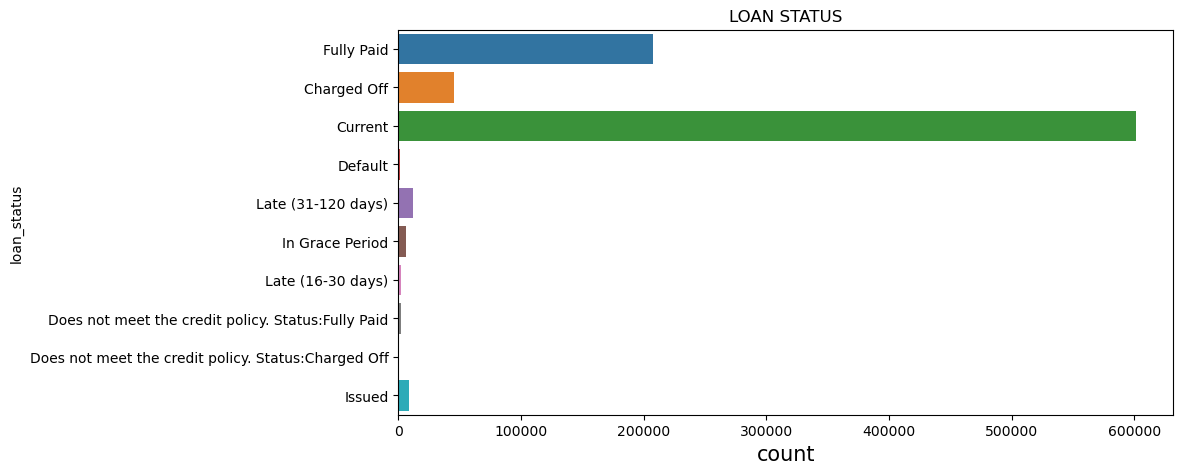

In [14]:
### plot for Target Variable
plt.figure(figsize=(10,5))
plt.xlabel("Bar Plot of Target Variable", fontsize=15)
# count plot on single categorical variable
sns.countplot(y='loan_status', data = df1).set(title='LOAN STATUS')
# Show the plot
plt.show()

In [15]:
loan_data = df1[(df1['loan_status'] == "Fully Paid") | (df1['loan_status'] == "Charged Off")]

In [16]:
loan_data.shape

(252971, 53)

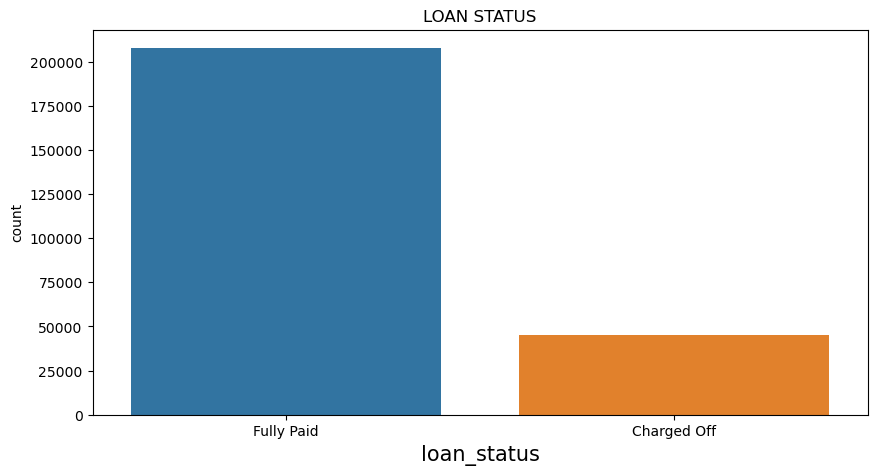

In [17]:
### plot for Target Variable
plt.figure(figsize=(10,5))
plt.xlabel("Bar Plot of Target Variable", fontsize=15)
# count plot on single categorical variable
sns.countplot(x='loan_status', data = loan_data).set(title='LOAN STATUS')
# Show the plot
plt.show()

In [18]:
loan_data.loan_status = loan_data.loan_status.astype('category').cat.codes

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\2974162297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.loan_status = loan_data.loan_status.astype('category').cat.codes


In [19]:
loan_data.loan_status.value_counts()

1    207723
0     45248
Name: loan_status, dtype: int64

In [20]:
### Exploratory Data Analysis
## Data Preprocessing/cleaning
# id and member_id
#We can remove id and member_id since they will be of no use in prediction of loan status.
loan_data = loan_data.drop(["id", "member_id"], axis=1)

In [21]:
##drop this variable
loan_data = loan_data.drop(["emp_title"], axis=1)

In [22]:
# Lets fill mode value in place of the missing value
loan_data["emp_length"].value_counts(ascending=False).head()
loan_data["emp_length"]= loan_data["emp_length"].fillna(loan_data["emp_length"].mode()[0])

In [23]:
# Convert to date time
loan_data["last_pymnt_d"]= pd.to_datetime(loan_data["last_pymnt_d"])
loan_data["last_pymnt_d"].value_counts(ascending=False).head()
# Lets fill mode value in place of the missing value
loan_data["last_pymnt_d"]=loan_data["last_pymnt_d"].fillna(loan_data["last_pymnt_d"].mode()[0])

In [24]:
# Let's fill the Median in place of the missing values
loan_data["revol_util"].value_counts(ascending=False).head()
loan_data["revol_util"]= loan_data["revol_util"].fillna(loan_data["revol_util"].median())

In [25]:
# Lets fill mode value in place of the missing value
loan_data["purpose"].value_counts(ascending=False).head()
loan_data["purpose"]=loan_data["purpose"].fillna(loan_data["purpose"].mode()[0])

In [26]:
# Lets fill mode value in place of the missing value
loan_data["collections_12_mths_ex_med"].value_counts()
loan_data["collections_12_mths_ex_med"]= loan_data["collections_12_mths_ex_med"].fillna(loan_data["collections_12_mths_ex_med"].mode()[0])

In [27]:
# Convert to date time
loan_data["last_credit_pull_d"]= pd.to_datetime(loan_data["last_credit_pull_d"])
loan_data["last_credit_pull_d"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
loan_data["last_credit_pull_d"]= loan_data["last_credit_pull_d"].fillna(loan_data["last_credit_pull_d"].mode()[0])

In [28]:
# Lets fill mode value in place of the missing value
loan_data["acc_now_delinq"].value_counts(ascending=False)
loan_data["acc_now_delinq"]=loan_data["acc_now_delinq"].fillna(loan_data["acc_now_delinq"].mode()[0])

In [29]:
# Let's fill the Median in place of the missing values
loan_data["total_acc"].value_counts(ascending=False)
loan_data["total_acc"]= loan_data["total_acc"].fillna(loan_data["total_acc"].median())

In [30]:
# Let's fill the Median in place of the missing values
loan_data["open_acc"].value_counts(ascending=False)
loan_data["open_acc"]= loan_data["open_acc"].fillna(loan_data["open_acc"].median())

In [31]:
# Convert to date time
loan_data["earliest_cr_line"]= pd.to_datetime(loan_data["earliest_cr_line"])
loan_data["earliest_cr_line"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
loan_data["earliest_cr_line"]= loan_data["earliest_cr_line"].fillna(loan_data["earliest_cr_line"].mode()[0])

In [32]:
# Lets fill mode value in place of the missing value
loan_data["inq_last_6mths"].value_counts(ascending=False)
loan_data["inq_last_6mths"]= loan_data["inq_last_6mths"].fillna(loan_data["inq_last_6mths"].mode()[0])

In [33]:
# Lets fill mode value in place of the missing value
loan_data["pub_rec"].value_counts(ascending=False)
loan_data["pub_rec"]= loan_data["pub_rec"].fillna(loan_data["pub_rec"].mode()[0])

In [34]:
# Lets fill mode value in place of the missing value
loan_data["delinq_2yrs"].value_counts(ascending=False)
loan_data["delinq_2yrs"]= loan_data["delinq_2yrs"].fillna(loan_data["delinq_2yrs"].mode()[0])

In [35]:
# Let's fill the Median in place of the missing values
loan_data["annual_inc"].value_counts(ascending=False)
loan_data["annual_inc"]= loan_data["annual_inc"].fillna(loan_data["annual_inc"].median())

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\2634155709.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data["loan_amnt"])


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

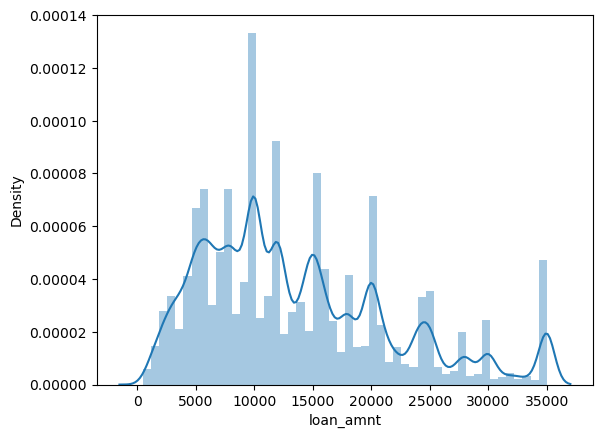

In [36]:
#### Univariate/Bivariate Data analysis
#### loan_amnt 
sns.distplot(loan_data["loan_amnt"])

In [37]:
### funded_amnt and funded_amnt_inv
# funded_amnt: The total amount committed to that loan at that point in time.
# funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
loan_data.funded_amnt.describe()

count    252971.000000
mean      13522.193749
std        8109.211388
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18075.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [38]:
loan_data.funded_amnt_inv.describe()

count    252971.000000
mean      13429.174497
std        8127.682956
min           0.000000
25%        7200.000000
50%       11975.000000
75%       18000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64

In [39]:
## Correlation coefficient
np.corrcoef(loan_data.funded_amnt, loan_data.funded_amnt_inv)

array([[1.        , 0.99461173],
       [0.99461173, 1.        ]])

In [40]:
np.corrcoef(loan_data.funded_amnt_inv, loan_data.loan_amnt)

array([[1.        , 0.99174061],
       [0.99174061, 1.        ]])

In [41]:
loan_data[['funded_amnt','funded_amnt_inv','loan_amnt']].head()

,funded_amnt,funded_amnt_inv,loan_amnt
0,5000.0,4975.0,5000.0
1,2500.0,2500.0,2500.0
2,2400.0,2400.0,2400.0
3,10000.0,10000.0,10000.0
5,5000.0,5000.0,5000.0


In [42]:
## Since, both funded_amnt and funded_amnt_inv are correlated with loan amount we will have to drop them.
loan_data = loan_data.drop(["funded_amnt", "funded_amnt_inv"], axis=1)

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\588323632.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data["int_rate"])


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

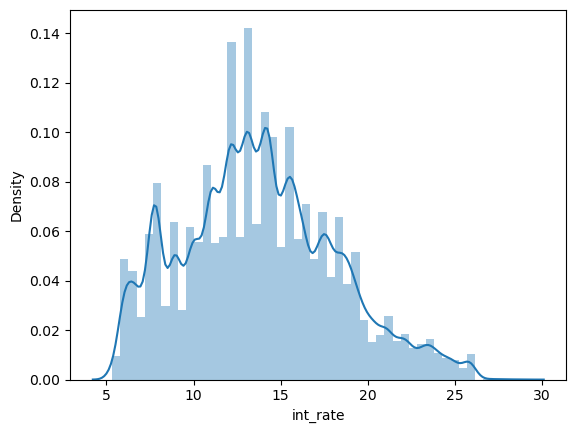

In [43]:
####  int_rate VARIABLE
sns.distplot(loan_data["int_rate"])

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

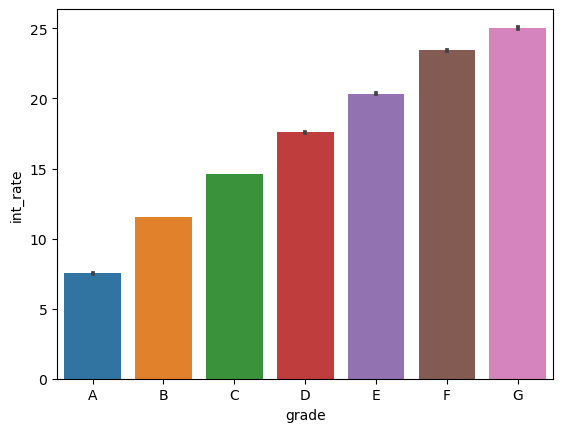

In [44]:
### int_rate, grade and sub grade
sns.barplot(x="grade", y="int_rate", data = loan_data, order= ["A","B","C","D","E","F","G"])

<AxesSubplot:xlabel='sub_grade', ylabel='int_rate'>

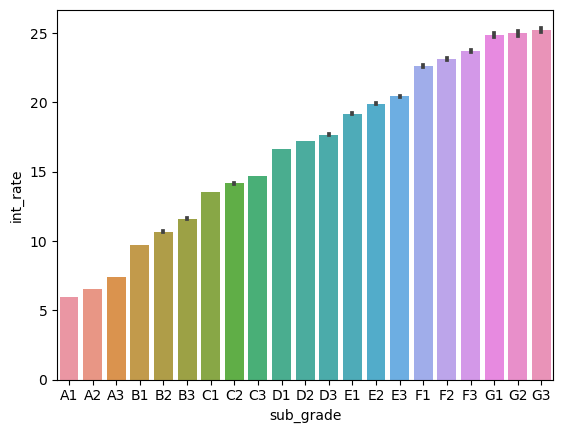

In [45]:
### SUB_GRADE & INT_RATE
sns.barplot(x="sub_grade", y="int_rate" ,data = loan_data,order= ["A1","A2","A3","B1","B2","B3","C1","C2","C3","D1","D2","D3","E1","E2","E3","F1","F2","F3","G1","G2","G3"])

In [46]:
## It can be noted that grade and sub grade are given based on interest rate, as such they both can be dropped
loan_data = loan_data.drop(["grade","sub_grade"], axis = 1)

In [47]:
### zip_code variable
loan_data.zip_code.isna().sum()

0

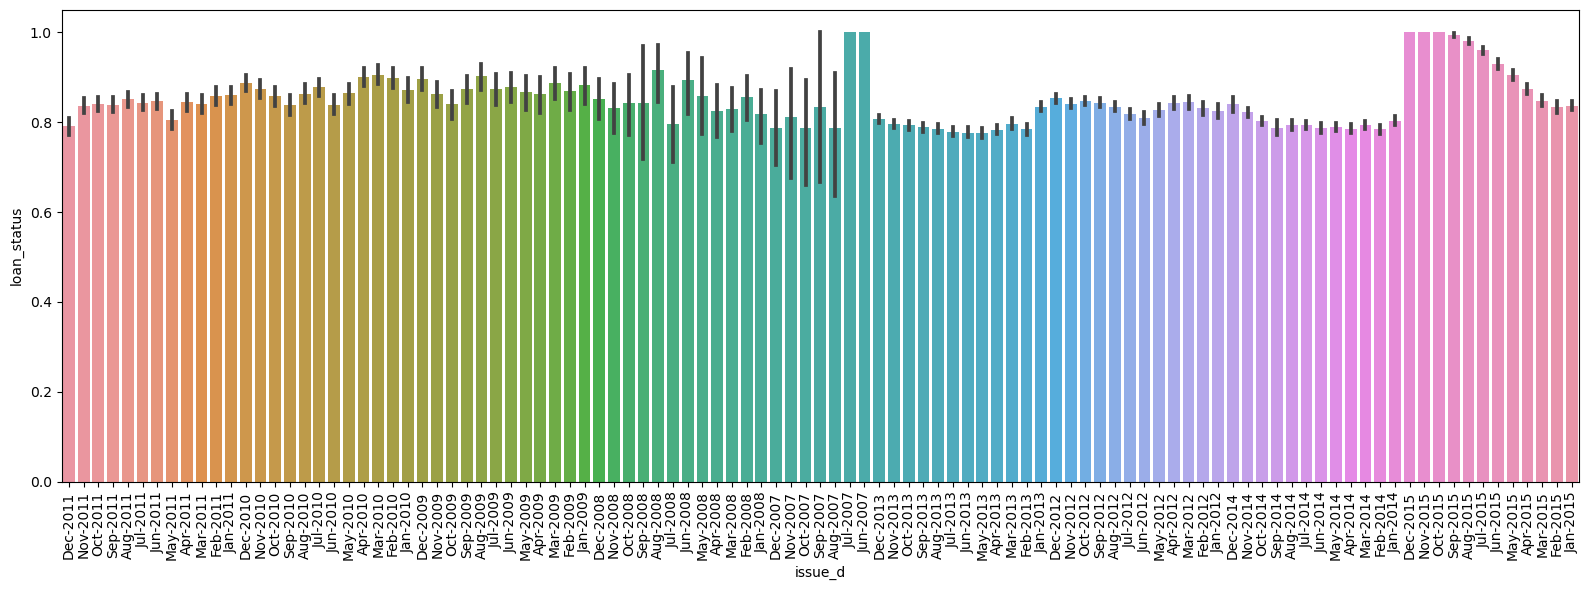

In [48]:
#issue_d
#When the loan was funded do not add value in our analysis. 
#Also, it is a time series data and it will expand our model. So, better to remove it.
plt.figure(figsize=(16,6))
sns.barplot(x="issue_d", y="loan_status", data=loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [49]:
loan_data = loan_data.drop("issue_d", axis= 1)

In [50]:
##out_prncp, out_prncp_inv
#Both of this are related to remaining outstanding principal. It is about the future so they are of no use.
loan_data = loan_data.drop(["out_prncp","out_prncp_inv"], axis = 1)

In [51]:
#total_pymnt, total_pymnt_inv, total_rec_prncp
#total_pymnt: Payments received to date for total amount funded
#total_pymnt_inv: Payments received to date for portion of total amount funded by investors
#total_rec_prncp: Principal received to date

In [52]:
np.corrcoef(loan_data.total_pymnt, loan_data.total_pymnt_inv)

array([[1.       , 0.9957378],
       [0.9957378, 1.       ]])

In [53]:
np.corrcoef(loan_data.total_pymnt, loan_data.total_rec_prncp)

array([[1.        , 0.97557076],
       [0.97557076, 1.        ]])

In [54]:
#removing total_payment_inv and total_rec_prncp
loan_data = loan_data.drop(["total_pymnt_inv","total_rec_prncp"], axis = 1)


C:\Users\charl\AppData\Local\Temp\ipykernel_9076\468828286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data.total_rec_late_fee)


<AxesSubplot:xlabel='total_rec_late_fee', ylabel='Density'>

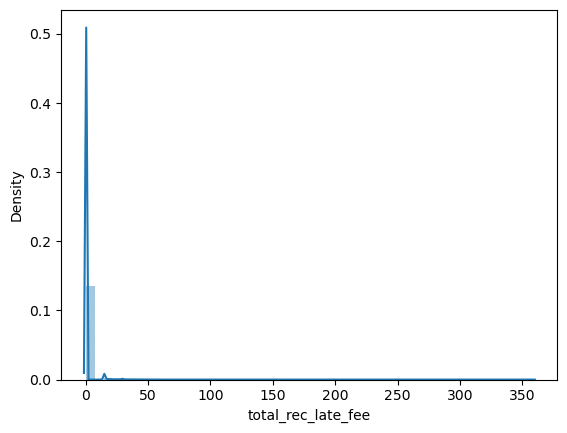

In [55]:
#total_rec_late_fee
#Late fees received to date This is considered in total payment and does not add value in our analysis so removing it.
sns.distplot(loan_data.total_rec_late_fee)

In [56]:
loan_data = loan_data.drop("total_rec_late_fee", axis = 1)

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\3365827804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data.total_rec_int)


<AxesSubplot:xlabel='total_rec_int', ylabel='Density'>

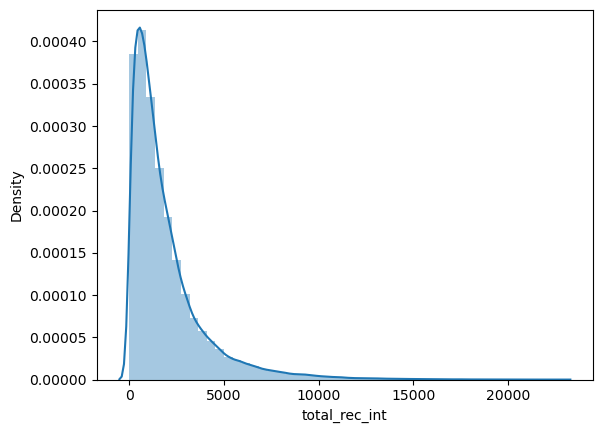

In [57]:
#total_rec_int
#Interest received to date This is dependent on the loan duration and interest of the loan.
#So, droppig this to make model simpler.
sns.distplot(loan_data.total_rec_int)

In [58]:
loan_data = loan_data.drop("total_rec_int", axis = 1)

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\1103164517.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data.recoveries)


<AxesSubplot:xlabel='recoveries', ylabel='Density'>

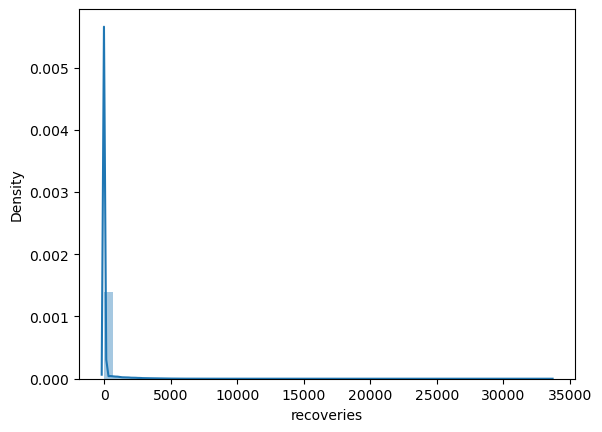

In [59]:
##recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt
## recoveries, collection_recovery_fee,last_pymnt_amnt: These variables are not useful as they are included in total amount paid.
## last_pymnt_d is not useful as it does not help predict the future status of the loan.
sns.distplot(loan_data.recoveries)


C:\Users\charl\AppData\Local\Temp\ipykernel_9076\931018847.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data.collection_recovery_fee)


<AxesSubplot:xlabel='collection_recovery_fee', ylabel='Density'>

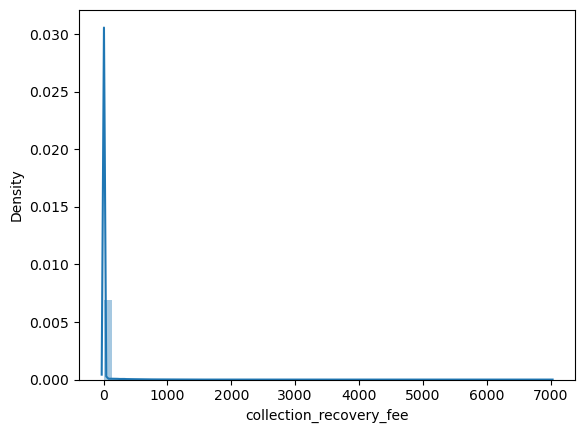

In [60]:
sns.distplot(loan_data.collection_recovery_fee)

C:\Users\charl\AppData\Local\Temp\ipykernel_9076\4112447920.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data.last_pymnt_amnt)


<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

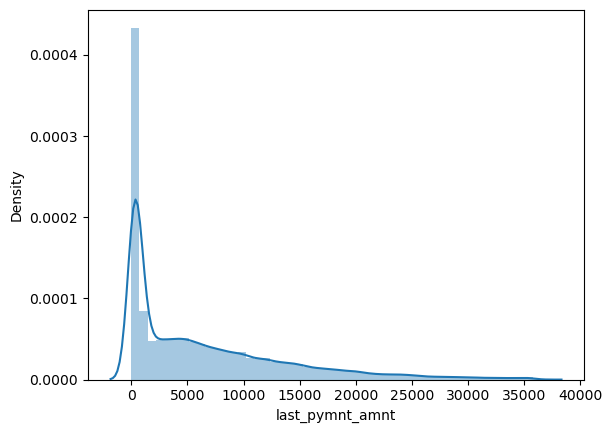

In [61]:
sns.distplot(loan_data.last_pymnt_amnt)

In [62]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [63]:
loan_data.shape

(252971, 35)

In [64]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [65]:
##url
##this variable is not needed
loan_data = loan_data.drop("url", axis = 1)

In [66]:
### policy_code, application_type, pymnt_plan
loan_data.policy_code.value_counts()

1.0    252971
Name: policy_code, dtype: int64

In [67]:
loan_data.application_type.value_counts()

INDIVIDUAL    252970
JOINT              1
Name: application_type, dtype: int64

In [68]:
loan_data.pymnt_plan.value_counts()

n    252969
y         2
Name: pymnt_plan, dtype: int64

In [69]:
loan_data.shape[0]

252971

In [70]:
loan_data = loan_data.drop(["policy_code", "application_type", "pymnt_plan"], axis = 1)
# since this does not help anyway in our prediction

In [71]:
##initial_list_status
loan_data.initial_list_status.value_counts()

f    182079
w     70892
Name: initial_list_status, dtype: int64

<AxesSubplot:xlabel='initial_list_status', ylabel='loan_status'>

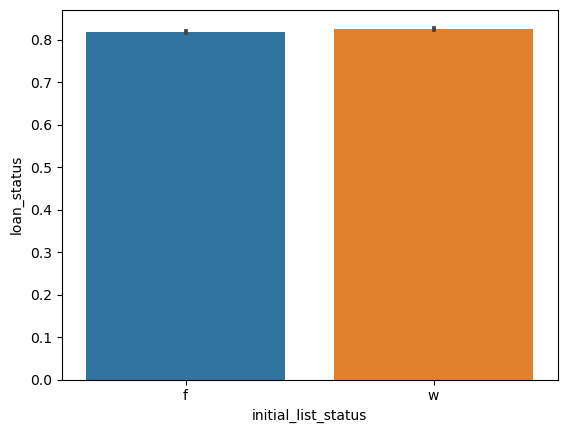

In [72]:
## initial_list_status plot
sns.barplot(x="initial_list_status", y="loan_status", data = loan_data)

In [73]:
# this does not really matter and hence we remove
loan_data = loan_data.drop("initial_list_status", axis = 1)

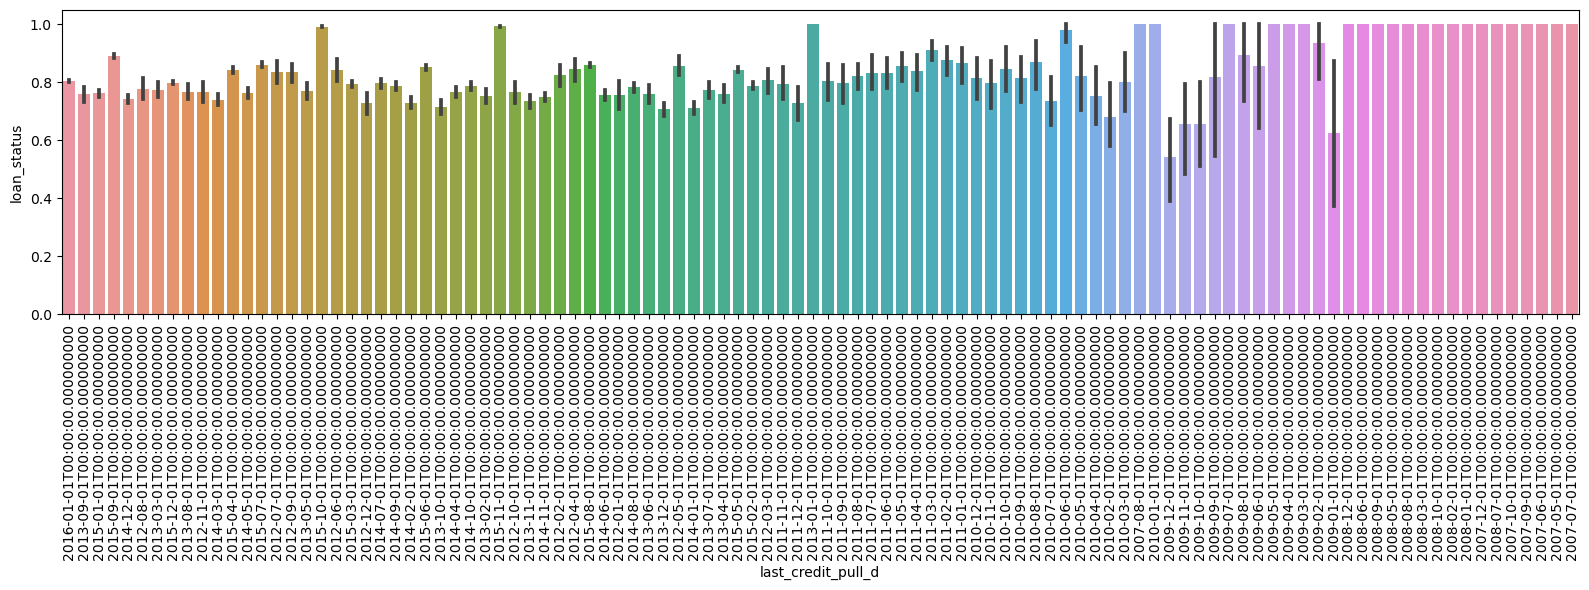

In [74]:
### last_credit_pull_d
## Will have to remove it as it will expand our model
plt.figure(figsize=(16,6))
sns.barplot(x="last_credit_pull_d", y="loan_status", data=loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [75]:
loan_data = loan_data.drop("last_credit_pull_d", axis = 1)

In [76]:
##collections_12_mths_ex_med
loan_data.collections_12_mths_ex_med.value_counts()

0.0    251397
1.0      1466
2.0        96
3.0         8
4.0         2
6.0         1
5.0         1
Name: collections_12_mths_ex_med, dtype: int64

<AxesSubplot:ylabel='count'>

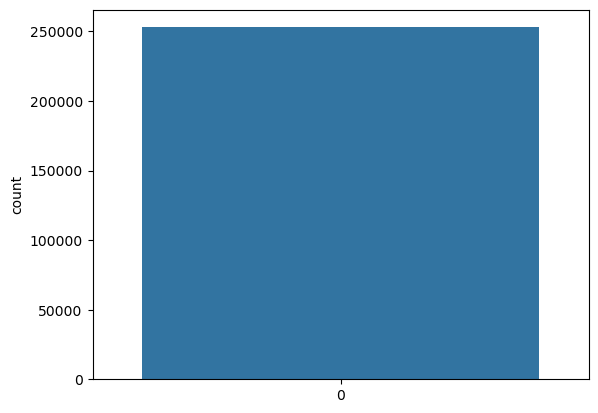

In [77]:
sns.countplot(loan_data.collections_12_mths_ex_med)

In [78]:
##removing it as most of the values are 0.
loan_data = loan_data.drop("collections_12_mths_ex_med", axis = 1)

In [79]:
### purpose and title
loan_data.purpose.value_counts()

debt_consolidation    148363
credit_card            50076
home_improvement       14929
other                  14277
major_purchase          6265
small_business          4746
car                     3646
medical                 2854
moving                  2028
wedding                 1955
house                   1652
vacation                1588
educational              325
renewable_energy         267
Name: purpose, dtype: int64

In [80]:
loan_data.title.head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
Name: title, dtype: object

In [81]:
loan_data[["purpose","title"]].head(10)

,purpose,title
0,credit_card,Computer
1,car,bike
2,small_business,real estate business
3,other,personel
5,wedding,My wedding loan I promise to pay back
7,car,Car Downpayment
8,small_business,Expand Business & Buy Debt Portfolio
9,other,Building my credit history.
10,debt_consolidation,High intrest Consolidation
11,debt_consolidation,Consolidation


In [82]:
#As we can see, purpose and title are similar and title seems to be an explanation. 
#Purpose has all types of categories so let's drop title.
loan_data = loan_data.drop("title", axis =1)

In [83]:
### addr_state
loan_data.addr_state.value_counts()

CA    43110
NY    21338
TX    19343
FL    17545
NJ     9601
IL     9253
PA     8399
GA     8014
VA     7942
OH     7738
NC     6919
MA     6139
AZ     6077
MD     6007
MI     5996
WA     5915
CO     5613
MN     4460
MO     3954
NV     3809
CT     3681
OR     3353
AL     3147
WI     3078
LA     2952
SC     2818
IN     2800
TN     2426
KY     2268
OK     2131
UT     2112
KS     2083
AR     1754
HI     1478
NM     1377
NH     1148
WV     1137
RI     1087
DC      837
MT      736
DE      667
AK      663
WY      602
SD      544
VT      428
MS      421
NE       38
ME       13
ND        8
IA        6
ID        6
Name: addr_state, dtype: int64

In [84]:
# As, there are somany categories we will have to drop this feature as it will increase variables if we encode them.

loan_data = loan_data.drop("addr_state", axis = 1)

In [85]:
### Other variables that will need to drop
loan_data= loan_data.drop("acc_now_delinq", axis=1)
loan_data = loan_data.drop("tot_cur_bal", axis = 1 )
loan_data = loan_data.drop("tot_coll_amt", axis = 1 )

In [86]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'next_pymnt_d', 'total_rev_hi_lim'],
      dtype='object')

In [87]:

loan_data.shape

(252971, 23)

In [88]:
### Numerical features

In [89]:
num_cols = loan_data._get_numeric_data().columns
data = loan_data[num_cols]

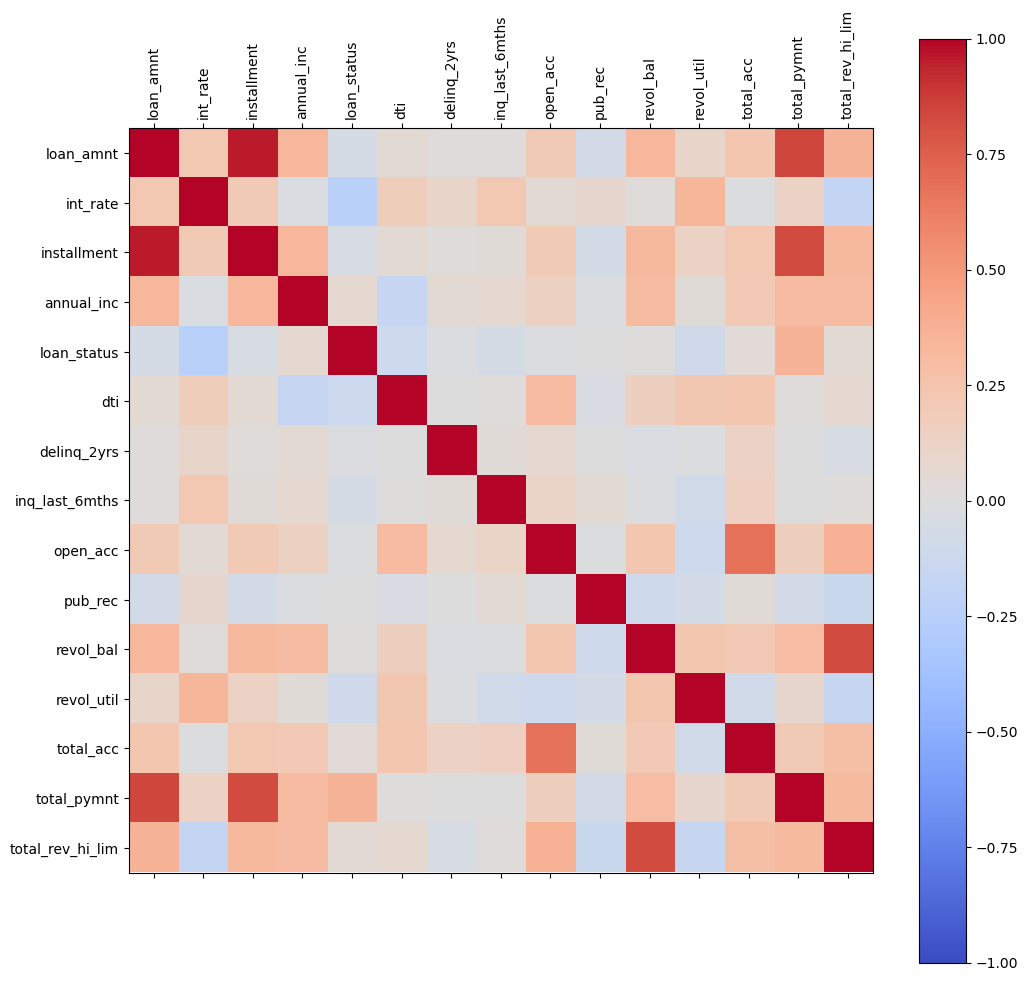

In [90]:
corr = data[num_cols].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [91]:
#### Categorical features
loan_data.columns[loan_data.dtypes == object]

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'zip_code', 'next_pymnt_d'],
      dtype='object')

In [92]:
loan_data = loan_data.drop("zip_code", axis = 1 )

In [93]:
#### Categorical features
loan_data.columns[loan_data.dtypes == object]

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'next_pymnt_d'],
      dtype='object')

<AxesSubplot:xlabel='term', ylabel='loan_status'>

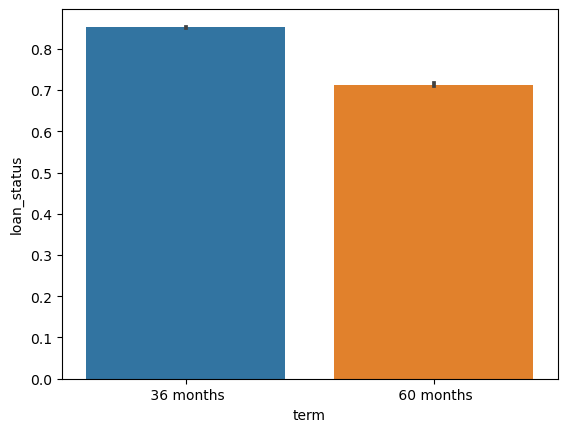

In [94]:
### term
sns.barplot(x = "term", y = "loan_status", data = loan_data)

In [97]:
## emp_length
loan_data.emp_length.value_counts()

10+ years    86778
2 years      23561
< 1 year     20886
3 years      20380
5 years      18059
1 year       16856
4 years      16197
6 years      14753
7 years      14085
8 years      11849
9 years       9567
Name: emp_length, dtype: int64

In [95]:
loan_data["emp_length"] = loan_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)

In [96]:
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x:int(x))

In [97]:
loan_data.emp_length.isna().sum()

0

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

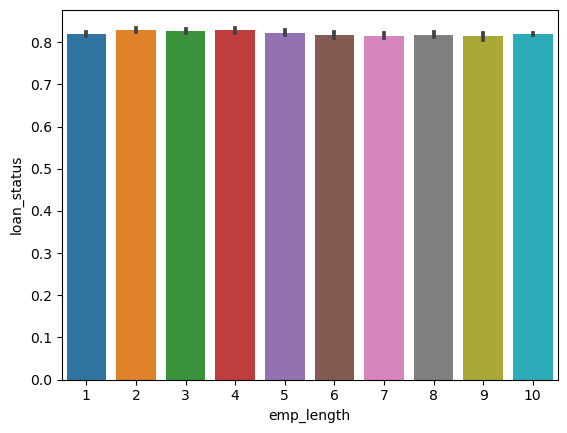

In [98]:
sns.barplot(x = "emp_length", y = "loan_status", data = loan_data)

In [99]:
### home_ownership
loan_data.home_ownership.value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

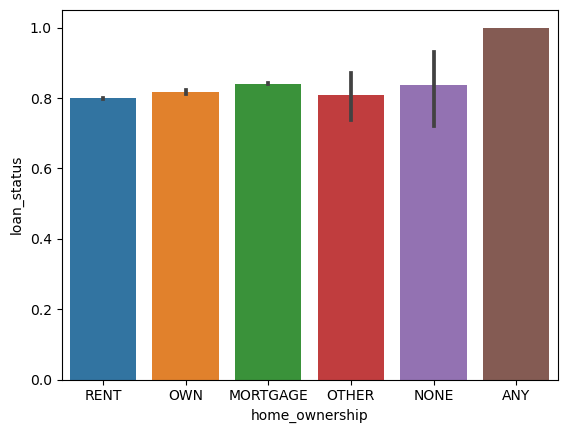

In [100]:
sns.barplot(x = "home_ownership", y = "loan_status", data = loan_data)

In [101]:
##verification_status
loan_data.verification_status.value_counts()

Verified           92896
Not Verified       86064
Source Verified    74011
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

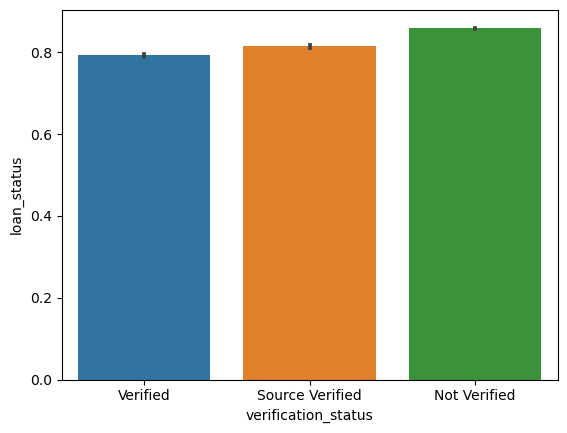

In [102]:
sns.barplot(x = "verification_status", y = "loan_status", data = loan_data)

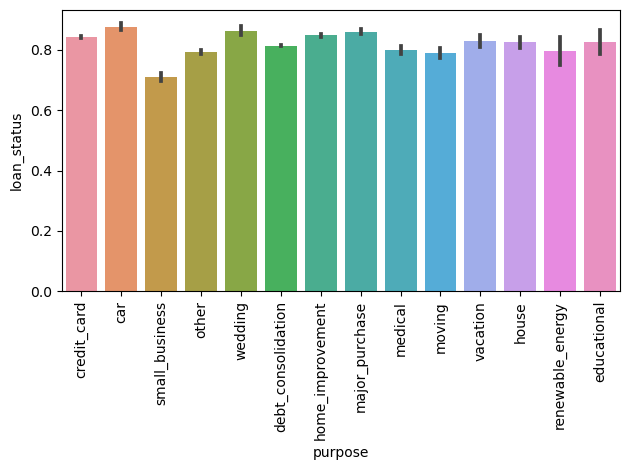

In [103]:
## purpose
sns.barplot(x="purpose", y="loan_status", data=loan_data)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

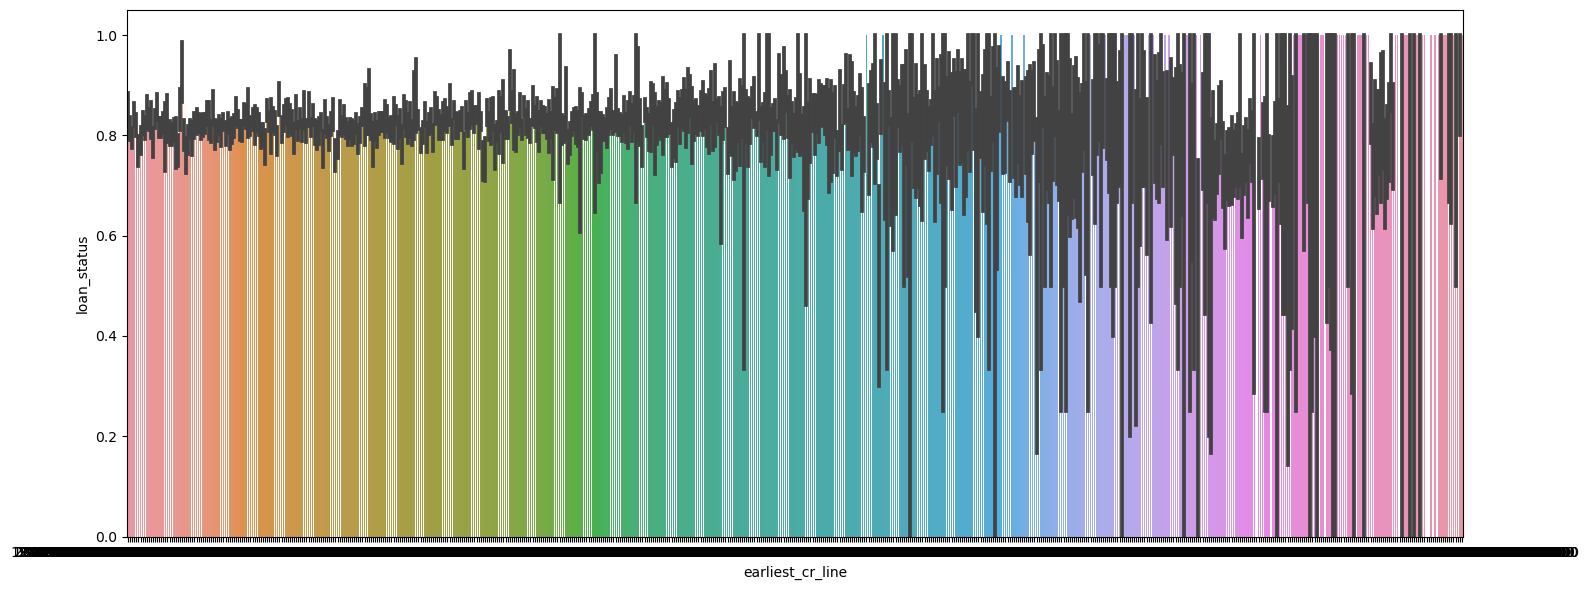

In [104]:
##earliest_cr_line
##The month the borrower's earliest reported credit line was opened
plt.figure(figsize=(16,6))
sns.barplot(x = "earliest_cr_line", y = "loan_status", data = loan_data)
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

In [105]:
loan_data = loan_data.drop("earliest_cr_line", axis = 1)## since it make our model more complex

In [106]:
####Encoding####
categorical = ['term', 'home_ownership', 'verification_status', 'purpose']

In [107]:
loan_data = pd.get_dummies(loan_data, columns = categorical)

In [108]:
loan_data.dtypes

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
loan_status                               int8
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
next_pymnt_d                            object
total_rev_hi_lim                       float64
term_ 36 months                          uint8
term_ 60 months                          uint8
home_ownership_ANY                       uint8
home_ownership_MORTGAGE                  uint8
home_ownershi

In [109]:
loan_data.isna().sum()

loan_amnt                                   0
int_rate                                    0
installment                                 0
emp_length                                  0
annual_inc                                  0
loan_status                                 0
dti                                         0
delinq_2yrs                                 0
inq_last_6mths                              0
open_acc                                    0
pub_rec                                     0
revol_bal                                   0
revol_util                                  0
total_acc                                   0
total_pymnt                                 0
next_pymnt_d                           252971
total_rev_hi_lim                        63708
term_ 36 months                             0
term_ 60 months                             0
home_ownership_ANY                          0
home_ownership_MORTGAGE                     0
home_ownership_NONE               

In [110]:
## Dealing with the missing values-imputation
##total_rev_hi_lim 
loan_data.total_rev_hi_lim.fillna(loan_data.total_rev_hi_lim.median(), inplace=True)

In [111]:
loan_data = loan_data.drop("next_pymnt_d", axis = 1)## since its not important for our prediction

In [112]:
loan_data.isna().sum()

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
total_pymnt                            0
total_rev_hi_lim                       0
term_ 36 months                        0
term_ 60 months                        0
home_ownership_ANY                     0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_sta

In [113]:
### Splitting Data into train and test data
Y = loan_data.loan_status
X = loan_data.drop("loan_status", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y )

In [114]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (202376, 40)
Shape of y_train:  (202376,)
Shape of x_test:  (50595, 40)
Shape of y_test:  (50595,)


In [115]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    

In [116]:
sm = SMOTE(random_state=12,sampling_strategy = 1.0)
x_train_r, y_train_r = sm.fit_resample(x_train, y_train)

In [117]:
############### LOGISTIC REGRESSION ############
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(x_train_r, y_train_r)

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001, random_state=21)

In [118]:
print_score(log_reg, x_train_r, y_train_r, x_test, y_test, train=False)

Test Result:

accuracy score: 0.9846

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      9050
           1       0.99      0.99      0.99     41545

    accuracy                           0.98     50595
   macro avg       0.98      0.97      0.97     50595
weighted avg       0.98      0.98      0.98     50595


Confusion Matrix: 
 [[ 8572   478]
 [  299 41246]]



(0.0, 2.0, 2.0, 0.0)

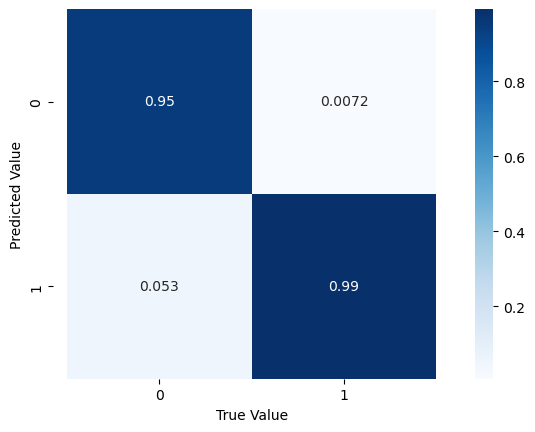

In [119]:
cm = confusion_matrix(y_test, log_reg.predict(x_test)).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

In [127]:
########### Random Forest ############
clf_rf = RandomForestClassifier(n_estimators=10, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

RandomForestClassifier(n_estimators=10, random_state=21)

In [128]:
print_score(clf_rf, x_train_r, y_train_r, x_test, y_test, train=False)


Test Result:

accuracy score: 0.9741

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      9050
           1       0.98      0.99      0.98     41545

    accuracy                           0.97     50595
   macro avg       0.97      0.94      0.95     50595
weighted avg       0.97      0.97      0.97     50595


Confusion Matrix: 
 [[ 8044  1006]
 [  303 41242]]



(0.0, 2.0, 2.0, 0.0)

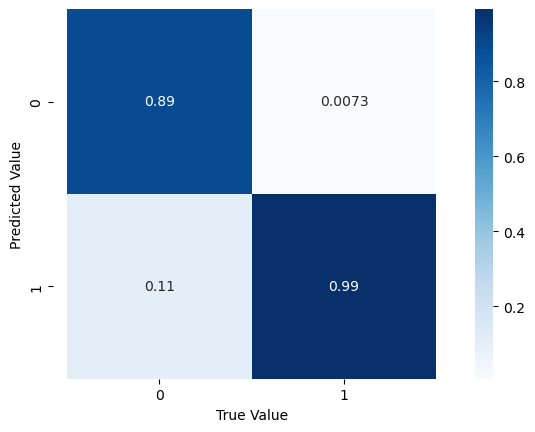

In [129]:
cm = confusion_matrix(y_test, clf_rf.predict(x_test)).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

In [130]:
len(loan_data.columns)

41

In [142]:
clf_rf.feature_importances_

array([8.48900710e-02, 5.45519370e-02, 7.25354325e-02, 1.73999679e-02,
       1.58881549e-02, 1.43400236e-02, 1.39164536e-02, 6.00158001e-02,
       1.12338511e-02, 8.12602348e-03, 1.49471330e-02, 1.84355217e-02,
       1.11059771e-02, 3.46453246e-01, 1.16056643e-02, 4.63375561e-02,
       2.16428495e-02, 3.24302023e-06, 2.13088871e-02, 3.18553430e-05,
       1.08179485e-04, 1.19143541e-02, 2.25171296e-02, 2.77984132e-02,
       1.64154132e-02, 1.79844466e-02, 1.25862794e-03, 2.14841768e-02,
       1.59659577e-02, 9.16754348e-05, 5.99923024e-03, 5.49009317e-04,
       2.89707162e-03, 9.61893965e-04, 8.29526409e-04, 5.71749640e-03,
       7.93669661e-05, 1.39792029e-03, 6.27671418e-04, 6.32791243e-04])

In [146]:
for name, importance in zip(loan_data.columns, clf_rf.feature_importances_):
    print(name, "=", importance)

loan_amnt = 0.08489007104680087
int_rate = 0.05455193696106939
installment = 0.07253543249472061
emp_length = 0.017399967864875847
annual_inc = 0.01588815490637418
loan_status = 0.014340023621530107
dti = 0.013916453649597793
delinq_2yrs = 0.06001580014396799
inq_last_6mths = 0.011233851074323824
open_acc = 0.00812602347782034
pub_rec = 0.014947133021754332
revol_bal = 0.01843552165501356
revol_util = 0.011105977074795938
total_acc = 0.3464532457522731
total_pymnt = 0.011605664256866374
total_rev_hi_lim = 0.046337556121673416
term_ 36 months = 0.02164284950500757
term_ 60 months = 3.2430202323457765e-06
home_ownership_ANY = 0.02130888709281054
home_ownership_MORTGAGE = 3.1855342969983454e-05
home_ownership_NONE = 0.00010817948536733231
home_ownership_OTHER = 0.011914354128255
home_ownership_OWN = 0.022517129596847794
home_ownership_RENT = 0.027798413163236037
verification_status_Not Verified = 0.016415413215591132
verification_status_Source Verified = 0.017984446636809908
verification_

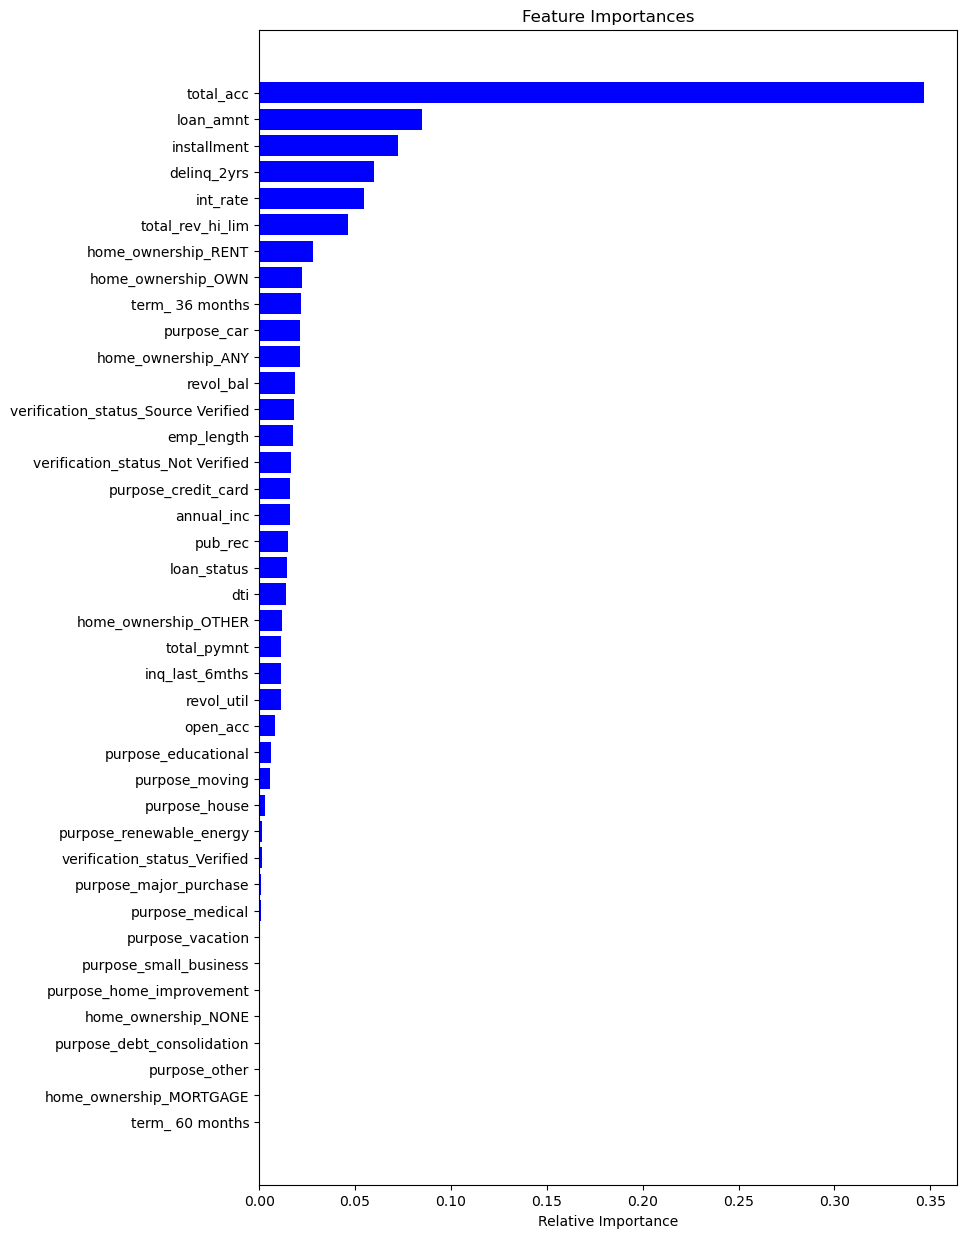

In [152]:
## Plotting feature importance
f, ax = plt.subplots(figsize=(9, 15))
width=0.55
features = loan_data.columns
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [153]:
###########LightGBM Model ##########
##LightGBM is a gradient boosting framework that uses tree based learning algorithm.
#LightGBM is a gradient boosting framework that uses tree based learning algorithm.
#LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
#It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose 
#the leaf with max delta loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more 
#loss than a level-wise algorithm.
# build the lightgbm model
def kfold_lightgbm(train_df, num_folds, stratified = False):
    print("Starting LightGBM. Train shape: {}".format(train_df.shape))
    
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = np.zeros(train_df.shape[0])

    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['loan_status']]
    
    # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['loan_status'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['loan_status'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['loan_status'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
        # Fitting the model and evaluating by AUC
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
        print_score(clf, train_x, train_y, valid_x, valid_y, train=False)
        # Dataframe holding the different features and their importance
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    display_importances(feature_importance_df)
    return feature_importance_df

In [154]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(15, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')

Starting LightGBM. Train shape: (252971, 41)


C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a f

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[1000]	training's auc: 0.997087	training's binary_logloss: 0.0387637	valid_1's auc: 0.99497	valid_1's binary_logloss: 0.0463774
[2000]	training's auc: 0.997937	training's binary_logloss: 0.0333426	valid_1's auc: 0.995299	valid_1's binary_logloss: 0.0440562
Test Result:

accuracy score: 0.9887

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     15141
           1       0.99      1.00      0.99     69183

    accuracy                           0.99     84324
   macro avg       0.99      0.97      0.98     84324
weighted avg       0.99      0.99      0.99     84324


Confusion Matrix: 
 [[14379   762]
 [  195 68988]]



C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a f

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[1000]	training's auc: 0.997069	training's binary_logloss: 0.0390127	valid_1's auc: 0.995108	valid_1's binary_logloss: 0.0450124
[2000]	training's auc: 0.998024	training's binary_logloss: 0.0331934	valid_1's auc: 0.995388	valid_1's binary_logloss: 0.0428086
Test Result:

accuracy score: 0.9889

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     15044
           1       0.99      1.00      0.99     69280

    accuracy                           0.99     84324
   macro avg       0.99      0.97      0.98     84324
weighted avg       0.99      0.99      0.99     84324


Confusion Matrix: 
 [[14305   739]
 [  201 69079]]



C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\charl\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a f

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[1000]	training's auc: 0.997206	training's binary_logloss: 0.0387616	valid_1's auc: 0.994772	valid_1's binary_logloss: 0.0452468
Test Result:

accuracy score: 0.9891

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     15063
           1       0.99      1.00      0.99     69260

    accuracy                           0.99     84323
   macro avg       0.99      0.97      0.98     84323
weighted avg       0.99      0.99      0.99     84323


Confusion Matrix: 
 [[14334   729]
 [  188 69072]]



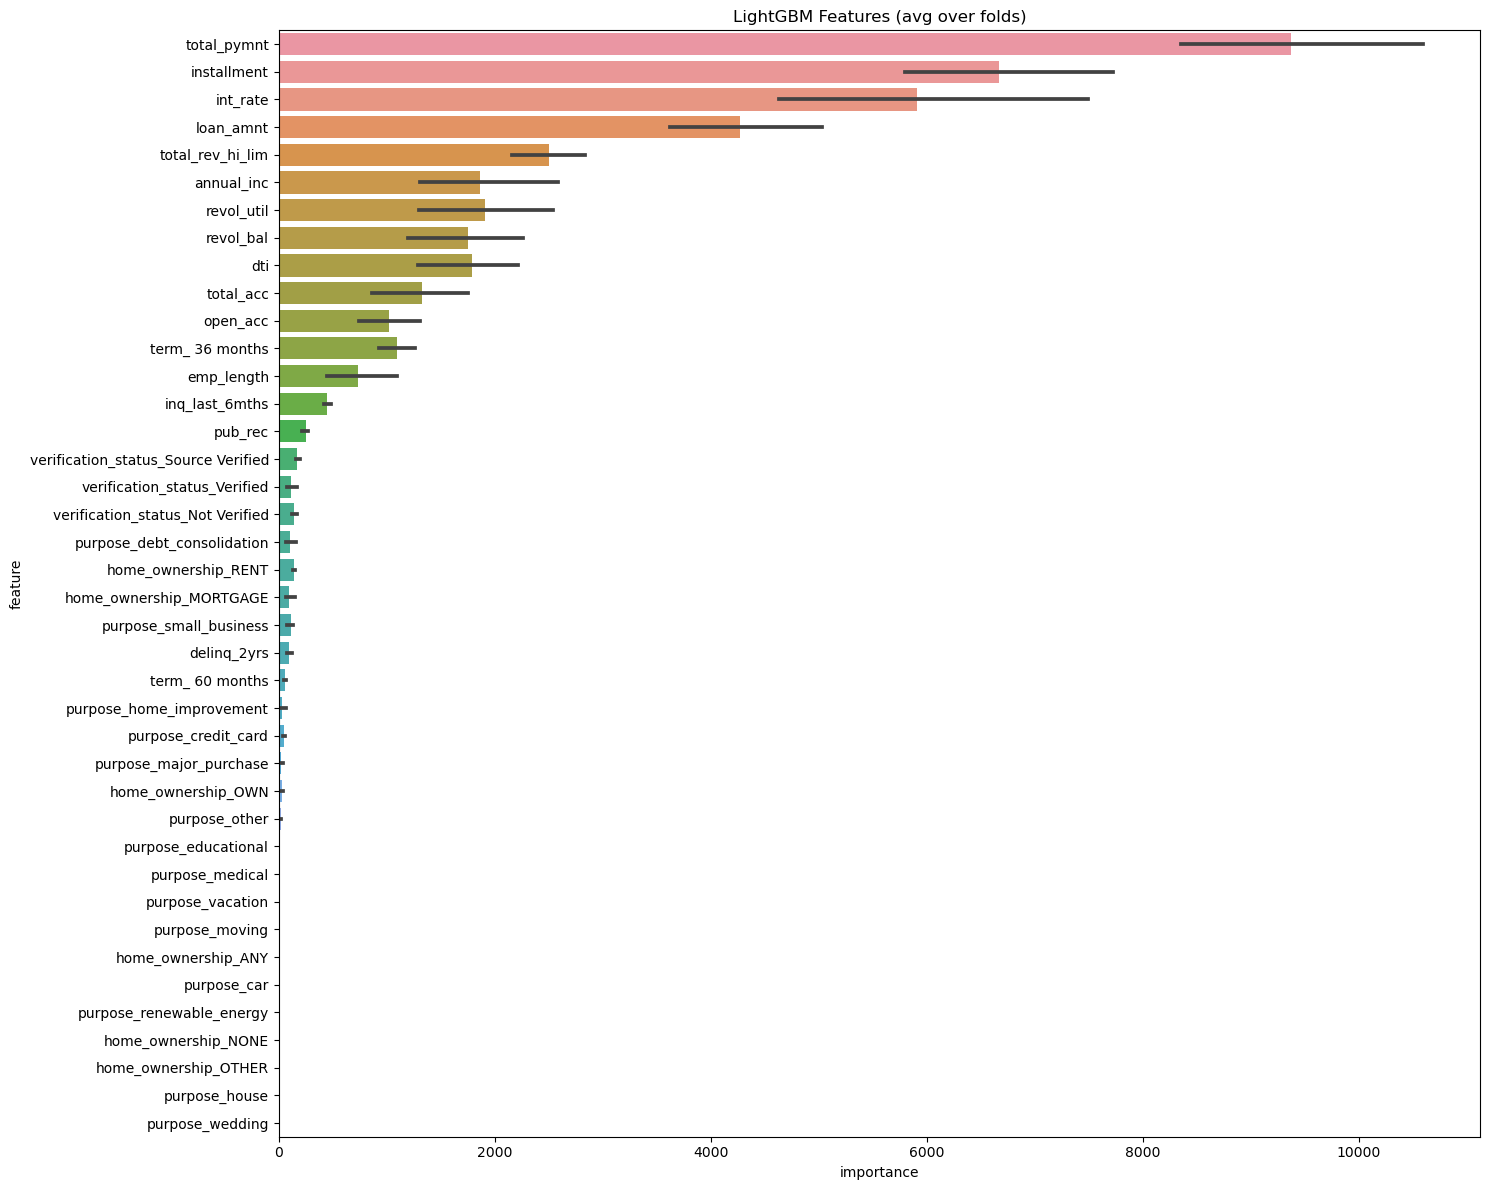

In [155]:
feat_importance = kfold_lightgbm(loan_data, num_folds= 3, stratified= False)